In [151]:
# Loading essential libraries
import numpy as np
import pandas as pd

In [153]:
# import the data
df = pd.read_csv('kaggle_fake_train.csv')

In [155]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# **Exploring the dataset**

In [158]:
df.shape

(20800, 5)

In [160]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [162]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [164]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [166]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [168]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

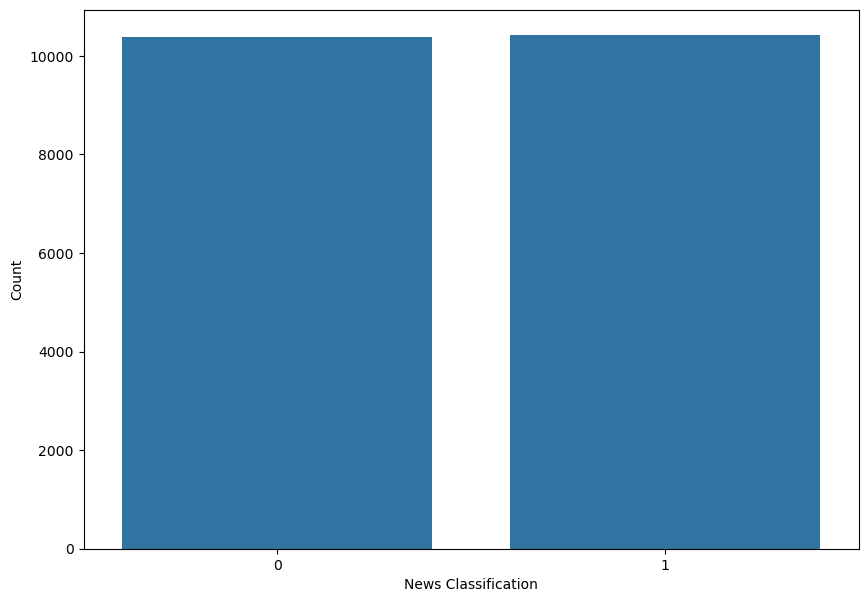

In [170]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')
plt.show()

# **Data Cleaning and Preprocessing**

In [173]:
print(df.shape)

(20800, 4)


In [175]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [177]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [179]:
# Dropping NaN values as the NaN values are less compared to records
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [181]:
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [183]:
news = df.copy()

In [185]:
news.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [187]:
news.reset_index(inplace=True)

In [189]:
news.head()

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [191]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rey-dal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [194]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [197]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [199]:
X.shape

(18285, 5000)

In [201]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [203]:
# Extracting dependent variable from the dataset
y = news['label']

# **Model Building**

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## *Multinomial Naive Bayes*

In [192]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [194]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [196]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 87.17%
Recall score is: 91.16%


In [198]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [200]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

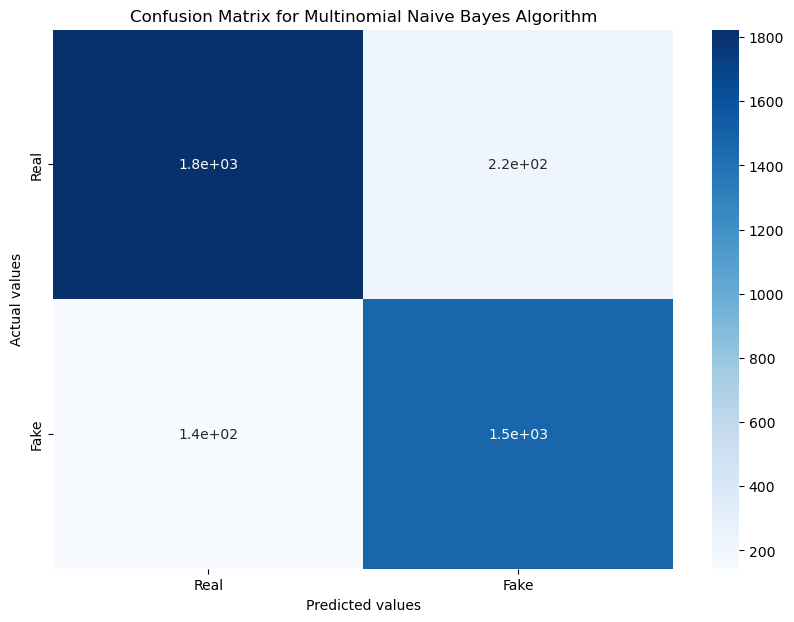

In [202]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [204]:
# Hyperparameter tuning the Naive Bayes Classifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# K-Fold Cross Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multinomial Naive Bayes Hyperparameter Tuning
nb_params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0, 1.2, 1.3, 1.5],
    'fit_prior': [True, False]
}

# Grid search cv 
nb_grid_search = GridSearchCV(
    nb_classifier, 
    nb_params, 
    cv=cv, 
    scoring='accuracy', 
    n_jobs=-1
)

# Fit GridSearchCV
nb_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best NB Parameters:", nb_grid_search.best_params_)
print("Best NB Score:", nb_grid_search.best_score_)

Best NB Parameters: {'alpha': 0.4, 'fit_prior': False}
Best NB Score: 0.9018321327795012


In [221]:
# Make predictions on test data
nb_y_pred = nb_best_classifier.predict(X_test)

In [223]:
# Accuracy, Precision and Recall for nb_best_classifier
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Best NB Accuracy score is: {}%".format(round(score1*100,2)))
print("Best NB Precision score is: {}%".format(round(score2*100,2)))
print("Best NB Recall score is: {}%".format(round(score3*100,2)))

---- Scores ----
Best NB Accuracy score is: 90.59%
Best NB Precision score is: 87.11%
Best NB Recall score is: 92.39%


## *Logistic Regression*

In [230]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [232]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [234]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 93.55%
Precision score is: 89.26%
Recall score is: 97.09%


In [236]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [238]:
lr_cm

array([[1851,  189],
       [  47, 1570]])

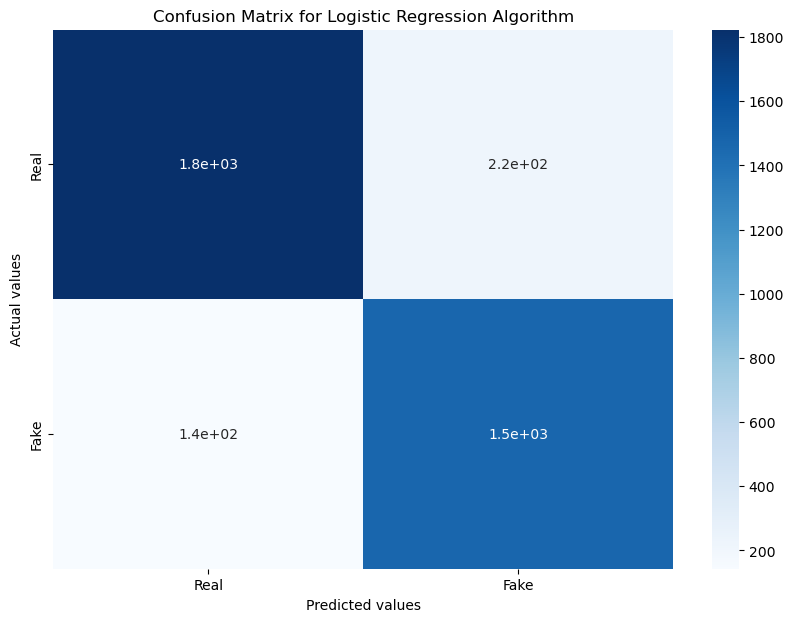

In [240]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [256]:
# Hyperparameter Grid
lr_params = {
    'C': [0.1, 0.3, 0.5, 0.7, 0.8, 1.0, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# K-Fold Cross Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV Configuration
lr_grid_search = GridSearchCV(
    lr_classifier,  
    lr_params, 
    cv=cv, 
    scoring='accuracy', 
    n_jobs=-1,  
    verbose=1
)

# Fit GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best LR Parameters:", lr_grid_search.best_params_)
print("Best LR Score:", lr_grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


Best LR Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best LR Score: 0.9318428004743794


In [258]:
# Retraining model with best params
best_lr_classifier = LogisticRegression(C=1.0,penalty='l2',solver='liblinear')
best_lr_classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [262]:
# Predicting the Test set results for best lr model
best_lr_y_pred = best_lr_classifier.predict(X_test)

In [264]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, best_lr_y_pred)
score2 = precision_score(y_test, best_lr_y_pred)
score3 = recall_score(y_test, best_lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 93.52%
Precision score is: 89.2%
Recall score is: 97.09%


In [149]:
from sklearn.linear_model import LogisticRegression

In [208]:
classifier = LogisticRegression(C=1,penalty='l2',solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

# **Predictions**

In [210]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [212]:
# Importing test dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [214]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [216]:
news_title = df_test['title']

In [218]:
news_title.shape

(5200,)

In [220]:
# For generating random integer
from random import randint

In [222]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Breitbart News Daily: Budget Priorities - Breitbart
Prediction: This is a REAL news.


In [224]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: ‘When Money Dies: The Nightmare of the Weimar Collapse’
Prediction: This is a FAKE news!


In [226]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: With Their Leaders at a Loss, Marine Veterans Fight Abusers - The New York Times
Prediction: This is a REAL news.
